# Loading Necessary Libraries

In [1]:
library(readr)
library(dplyr)
library(stringr)
library(ggplot2)
library(tidyr)
library(tm)       ## For text mining
library(textstem)     ## For lemmatization
library(tidytext)
library(wordcloud2)
library(pROC)
library(ROCR)
library(randomForest)   ## Random forest classification
library(naivebayes)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: ‘koRpus’


The following object is masked from ‘package:readr’:

    tokenize


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The fo

# Import Dataset

In [2]:
fake <- read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true <- read_csv('../input/fake-and-real-news-dataset/True.csv')

Parsed with column specification:
cols(
  title = col_character(),
  text = col_character(),
  subject = col_character(),
  date = col_character()
)

Parsed with column specification:
cols(
  title = col_character(),
  text = col_character(),
  subject = col_character(),
  date = col_character()
)



# **Data Visualisation & Preprocessing**

In [3]:
head(fake)

title,text,subject,date
<chr>,<chr>,<chr>,<chr>
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It 

In [4]:
head(true)

title                                                                
1 As U.S. budget fight looms, Republicans flip their fiscal script     
2 U.S. military to accept transgender recruits on Monday: Pentagon     
3 Senior U.S. Republican senator: 'Let Mr. Mueller do his job'         
4 FBI Russia probe helped by Australian diplomat tip-off: NYT          
5 Trump wants Postal Service to charge 'much more' for Amazon shipments
6 White House, Congress prepare for talks on spending, immigration     
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
fake$category <- 0
true$category <- 1

In [6]:
glimpse(fake)

Rows: 23,481
Columns: 5
$ title    <chr> "Donald Trump Sends Out Embarrassing New Year’s Eve Message;…
$ text     <chr> "Donald Trump just couldn t wish all Americans a Happy New Y…
$ subject  <chr> "News", "News", "News", "News", "News", "News", "News", "New…
$ date     <chr> "December 31, 2017", "December 31, 2017", "December 30, 2017…
$ category <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [7]:
glimpse(true)

Rows: 21,417
Columns: 5
$ title    <chr> "As U.S. budget fight looms, Republicans flip their fiscal s…
$ text     <chr> "WASHINGTON (Reuters) - The head of a conservative Republica…
$ subject  <chr> "politicsNews", "politicsNews", "politicsNews", "politicsNew…
$ date     <chr> "December 31, 2017", "December 29, 2017", "December 31, 2017…
$ category <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [8]:
# Merge 2 datasets
news <- bind_rows(fake, true)

In [9]:
news %>%
  sample_n(10)

title                                                                                                                                                                                       
1  Taiwan to allow visa-free entry for visitors from Philippines                                                                                                                               
2  WATCH: Teacher Busted Calling Black Student A ‘Punk-Ass N*****’ Who’s ‘Going To Get Shot’ (VIDEO)                                                                                           
3  A young Chinese rebel feels the pull of family ties                                                                                                                                         
4  All The Proof We’ll Ever Need That CNN Is In The Tank For Trump (VIDEO)                                                                                                                     
5  WHY IS THE PRESENCE OF RUSSIAN AIRCRAFT FIGHTER JETS NEAR U.S. SHORES INCREASING?                                                                                                           
6  U.S. lawmakers want more Iran sanctions, but can't agree                                                                                                                                    
7  SCARS & STRIFE: ‘The Purge Election Year’ Agitprop, Change Agents & False Left–Right Statecraft                                                                                             
8  BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops
9  FEEL THE BERN….How Hillary Walked Away From NH With More Super Delegates Than Sanders                                                                                                       
10 SHOCKING: Why Our Fed Government Will Grant “Disabled” Status With Benefits To Spanish Speaking Residents Of Puerto Rico                                                                    
   text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [10]:
glimpse(news)

Rows: 44,898
Columns: 5
$ title    <chr> "Donald Trump Sends Out Embarrassing New Year’s Eve Message;…
$ text     <chr> "Donald Trump just couldn t wish all Americans a Happy New Y…
$ subject  <chr> "News", "News", "News", "News", "News", "News", "News", "New…
$ date     <chr> "December 31, 2017", "December 31, 2017", "December 30, 2017…
$ category <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [11]:
news$category <- as.factor(news$category)

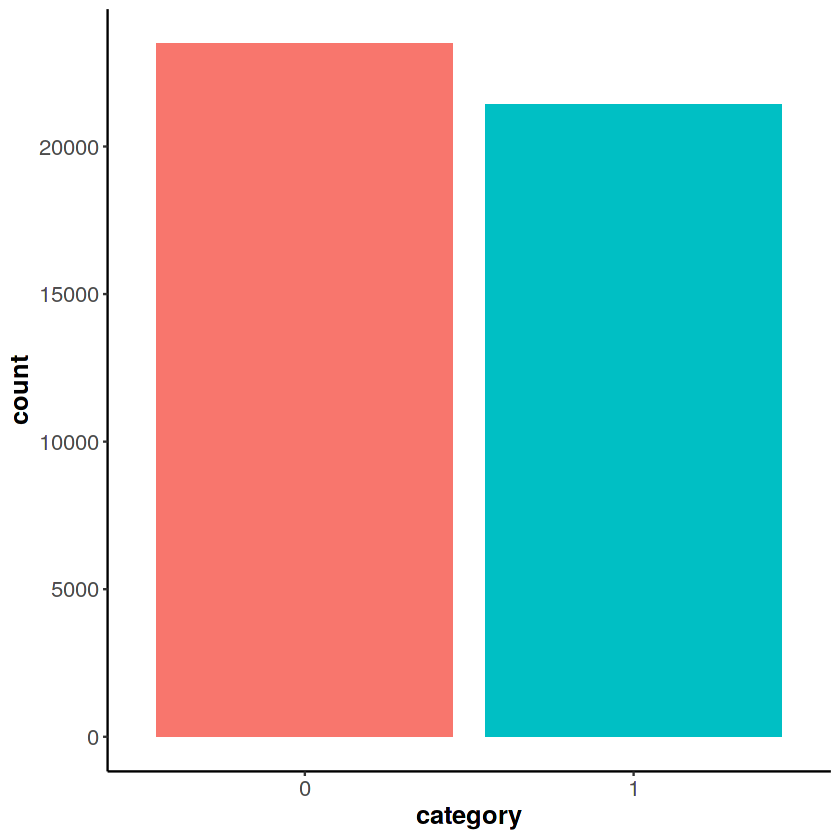

In [12]:
ggplot(news, aes(x = category, fill = category)) + 
    geom_bar() +
    theme_classic() +
    theme(axis.title = element_text(face = 'bold', size = 15),
          axis.text = element_text(size = 13)) +
    theme(legend.position = 'none')

> Dataset is balanced

In [13]:
# Summarize data
summary(news)

# Check for misisng values
summary(is.na(news))

    title               text             subject              date          
 Length:44898       Length:44898       Length:44898       Length:44898      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 category 
 0:23481  
 1:21417  
          

   title            text          subject           date        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:44898     FALSE:44267     FALSE:44898     FALSE:44898    
                 TRUE :631                                      
  category      
 Mode :logical  
 FALSE:44898    
                

In [14]:
# Change data type of subject to factor
news$subject <- as.factor(news$subject)

# News count by each Subject
news %>%
  group_by(subject) %>%
  count() %>%
  arrange(desc(n))

subject,n
<fct>,<int>
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


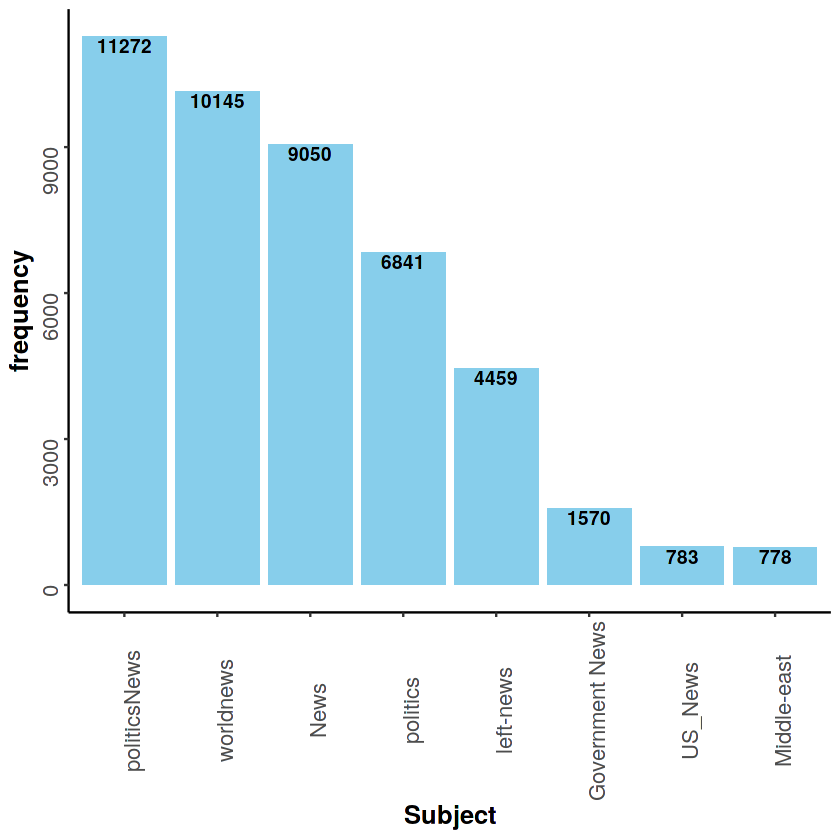

In [15]:
news %>%
  group_by(subject) %>%
  count(sort = TRUE) %>%
  rename(freq = n) %>%
  ggplot(aes(x = reorder(subject, -freq), y = freq)) + 
  geom_bar(stat = 'identity', fill = 'skyblue') +
  theme_classic() +
  xlab('Subject') +
  ylab('frequency') +
  geom_text(aes(label = freq), vjust = 1.2, fontface = 'bold') +
  theme(axis.title = element_text(face = 'bold', size = 15),
        axis.text = element_text(size = 13, angle = 90))

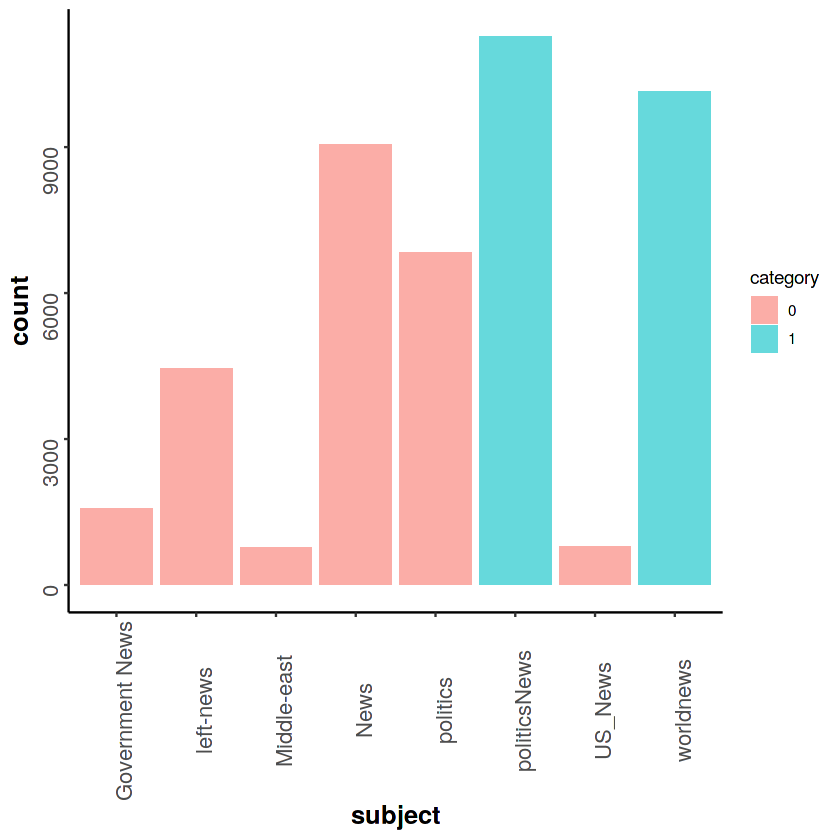

In [16]:
# Category wise subject bar plot
ggplot(news, aes(x = subject, fill = category)) +
  geom_bar(position = 'dodge', alpha = 0.6) +
  theme_classic() +
  theme(axis.title = element_text(face = 'bold', size = 15),
        axis.text = element_text(size = 13, angle = 90))

> Subjects are different for both categories

In [17]:
# Combine title and text column
news <- news %>% 
  select(title, text, category) %>%
  unite(col = text ,title, text, sep = ' ')  %>%  # Combine 'title' & 'text' column
  mutate(ID = as.character(1:nrow(news)))    # Uniqe row ID for furt
glimpse(news)

Rows: 44,898
Columns: 3
$ text     <chr> "Donald Trump Sends Out Embarrassing New Year’s Eve Message;…
$ category <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ ID       <chr> "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12…


In [18]:
# Create a corpus (type of object expected by tm)
doc <- VCorpus(VectorSource(news$text))

> **Data Cleaning**

In [19]:
# Convert text to lower case
doc <- tm_map(doc, content_transformer(tolower))

# Remove numbers
doc <- tm_map(doc, removeNumbers)

# Remove Punctuations
doc <- tm_map(doc, removePunctuation)

# Remove Stopwords
doc <- tm_map(doc, removeWords, stopwords('english'))

# Remove Whitespace
doc <- tm_map(doc, stripWhitespace)

In [20]:
# inspect output
writeLines(as.character(doc[[45]]))

watch awesome mashup michael flynn leading ‘lock ’ chant goes court video donald trump s disgraced national security adviser michael flynn just plead guilty lying fbi felony also agreed testify trump exchange leniency special counsel robert mueller s team irony beyond delicious especially since flynn infamously led lock chants republican national convention saying hillary clinton kind criminal trump elected d able put jail many trump supporters believe belongs well now tables turned flynn will heading jail people realize real criminals field day perhaps one best pieces twitter schaudenfraude video flynn heading court plead guilty lock chant playedi mashed michael flynn s perp walk audio leading lock chant pictwittercomlocjjxrq adam smith asmith december beyond awesome fools thought d get chance put hillary clinton jail live kind banana republic instead turning order save asses best circular firing squad us ever imagined michael flynn going sing like canary can keep equally criminal son

> It seems all the punctuations aren't removed.

In [21]:
doc <- tm_map(doc, content_transformer(str_remove_all), "[[:punct:]]")
writeLines(as.character(doc[[45]]))
writeLines(as.character(doc[[50]]))

watch awesome mashup michael flynn leading lock  chant goes court video donald trump s disgraced national security adviser michael flynn just plead guilty lying fbi felony also agreed testify trump exchange leniency special counsel robert mueller s team irony beyond delicious especially since flynn infamously led lock chants republican national convention saying hillary clinton kind criminal trump elected d able put jail many trump supporters believe belongs well now tables turned flynn will heading jail people realize real criminals field day perhaps one best pieces twitter schaudenfraude video flynn heading court plead guilty lock chant playedi mashed michael flynn s perp walk audio leading lock chant pictwittercomlocjjxrq adam smith asmith december beyond awesome fools thought d get chance put hillary clinton jail live kind banana republic instead turning order save asses best circular firing squad us ever imagined michael flynn going sing like canary can keep equally criminal son f

> Now it looks like all punctuations are removed

**What is Stemming?** 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun.

In [22]:
# Lemmatization
doc <- tm_map(doc, content_transformer(lemmatize_strings))

In [23]:
# Create Document Term Matrix
dtm <- DocumentTermMatrix(doc)
inspect(dtm)

<<DocumentTermMatrix (documents: 44898, terms: 197411)>>
Non-/sparse entries: 6914984/8856444094
Sparsity           : 100%
Maximal term length: 909
Weighting          : term frequency (tf)
Sample             :
       Terms
Docs    make one people president republican say state trump will year
  12407    6   7      6         8          5   1    45     1    3    2
  17850    6   8      6         9          6   1    46     5    4    3
  19622    6   7      6         8          5   1    45     1    3    2
  21979    4  18      4         2          0  25    15     0   10    9
  22304    7  25      5         4          0  13     7     6    7   12
  22507    7  14      2         4          0   5    10     0    4    5
  22762    4  18      4         2          0  25    15     0   10    9
  23087    7  25      5         4          0  13     7     6    7   12
  23290    7  14      2         4          0   5    10     0    4    5
  9732     6   8      6         9          6   1    46     5    4  

In [24]:
# remove all terms whose sparsity is greater than the threshold (x)
dtm.clean <- removeSparseTerms(dtm, sparse = 0.99)
inspect(dtm.clean)

<<DocumentTermMatrix (documents: 44898, terms: 2495)>>
Non-/sparse entries: 5249384/106771126
Sparsity           : 95%
Maximal term length: 16
Weighting          : term frequency (tf)
Sample             :
       Terms
Docs    make one people president republican say state trump will year
  12407    6   7      6         8          5   1    45     1    3    2
  17850    6   8      6         9          6   1    46     5    4    3
  19622    6   7      6         8          5   1    45     1    3    2
  21921    6  17      2         4          0   4    10    13    6   26
  21979    4  18      4         2          0  25    15     0   10    9
  22304    7  25      5         4          0  13     7     6    7   12
  22704    6  17      2         4          0   4    10    13    6   26
  22762    4  18      4         2          0  25    15     0   10    9
  23087    7  25      5         4          0  13     7     6    7   12
  9732     6   8      6         9          6   1    46     5    4    3


In [25]:
# Create Tidy data
df.tidy <- tidy(dtm.clean)
df.word<- df.tidy %>% 
    select(-document) %>%
    group_by(term) %>%
    summarize(freq = sum(count)) %>%
    arrange(desc(freq))

# Word cloud
set.seed(1234) # for reproducibility 
wordcloud2(data=df.word, size=1.6, color='random-dark')

`summarise()` ungrouping output (override with `.groups` argument)



HTML widgets cannot be represented in plain text (need html)

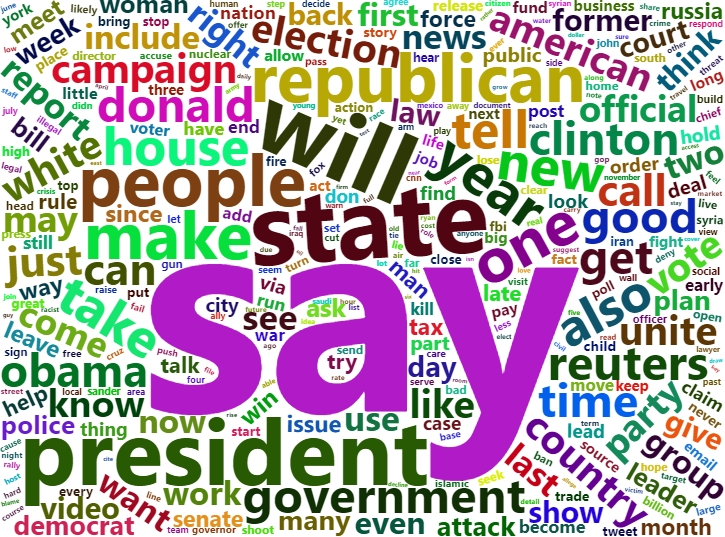

In [26]:
# Word cloud for the fake news
set.seed(1234)
df.tidy %>% 
    inner_join(news, by = c('document' = 'ID')) %>% 
    select(-text) %>%
    group_by(term, category) %>%
    summarize(freq = sum(count)) %>%
    filter(category == 0) %>%
    select(-category) %>%
    arrange(desc(freq)) %>%
    wordcloud2(size = 1.4,  color='random-dark')

`summarise()` regrouping output by 'term' (override with `.groups` argument)



HTML widgets cannot be represented in plain text (need html)

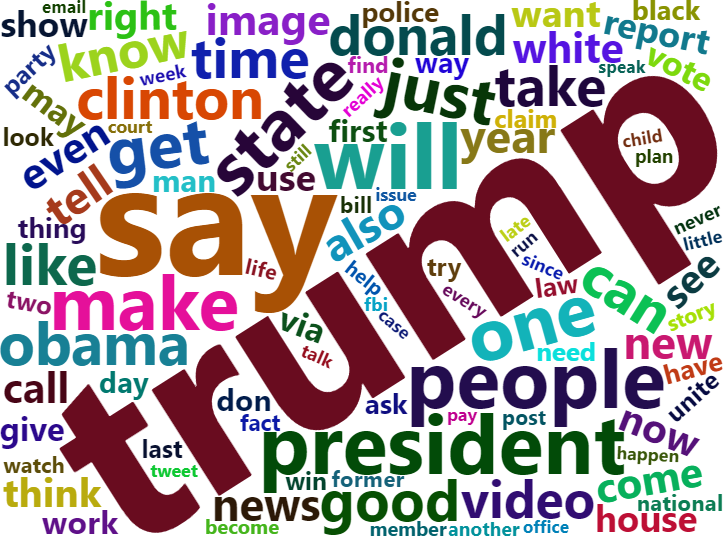

In [27]:
# Word cloud for the true news
set.seed(1234)
df.tidy %>% 
    inner_join(news, by = c('document' = 'ID')) %>% 
    select(-text) %>%
    group_by(term, category) %>%
    summarize(freq = sum(count)) %>%
    filter(category == 1) %>%
    select(-category) %>%
    arrange(desc(freq)) %>%
    wordcloud2(size = 1.6,  color='random-dark')

`summarise()` regrouping output by 'term' (override with `.groups` argument)



HTML widgets cannot be represented in plain text (need html)

In [28]:
# Convert dtm to matrix
dtm.mat <- as.matrix(dtm.clean)
dim(dtm.mat)

[1] 44898  2495

In [29]:
# dtm.df <- as.data.frame(dtm.mat)
dtm.mat <- cbind(dtm.mat, category = news$category)
dtm.mat[1:10, c(1, 2, 3, ncol(dtm.mat))]

,abandon,abc,ability,category
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,0,1


> Here first 10 observations for category are 1 whereas in news data initial observations are 0 (fake news).

In [30]:
summary(dtm.mat[,'category'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.477   2.000   2.000 

> From summary minimum value of category is 1 and maximum value of category is 2. There might be chance that 0 & 1 are replaced by 1 & 2 respectively.

In [31]:
as.data.frame(dtm.mat) %>% count(category)
news %>% count(category)

category,n
<dbl>,<int>
1,23481
2,21417


category,n
<fct>,<int>
0,23481
1,21417


> It shows that count of 1's is equivalent to count of fake news and count of 2's are equivalent to count of true news.

In [32]:
# Convert matrix to data frame
dtm.df <- as.data.frame(dtm.mat)

# Replace valuees in category by original values (1 by 0 & 2 by 1)
dtm.df$category <- ifelse(dtm.df$category == 2, 1, 0)
dtm.df$category <- as.factor(dtm.df$category)
table(dtm.df$category)


    0     1 
23481 21417 

**Splitting Data into Train & Test Sets**

In [33]:
# Create 75:25 split
set.seed(1234)
index <- sample(nrow(dtm.df), nrow(dtm.df)*0.75, replace = FALSE)

train_news <- dtm.df[index,]
test_news <- dtm.df[-index,]

# make column names to follow R's variable naming convention
names(train_news) <- make.names(names(train_news))
names(test_news) <- make.names(names(test_news))

table(train_news$category)
table(test_news$category)


    0     1 
17522 16151 


   0    1 
5959 5266 

> Both Train & Test sets are balanced

# **Training Model**

In [34]:
# Naive Bayes Model
mdl_nb <- naive_bayes(category ~ ., data = train_news)

# Model Summary
summary(mdl_nb)


================================== Naive Bayes ================================== 
 
- Call: naive_bayes.formula(formula = category ~ ., data = train_news) 
- Laplace: 0 
- Classes: 2 
- Samples: 33673 
- Features: 2495 
- Conditional distributions: 
    - Gaussian: 2495
- Prior probabilities: 
    - 0: 0.5204
    - 1: 0.4796

--------------------------------------------------------------------------------- 


In [35]:
# Logistic Regression Model
mdl_lr <- glm(formula = category ~.,
              data = train_news,
              family = 'binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [36]:
# Random Forest Model
k <- round(sqrt(ncol(train_news)-1))
mdl_rf <- randomForest(formula = category ~ ., 
                       data = train_news,
                       ntree = 100,
                       mtry = k,
                       method = 'class')
mdl_rf


Call:
 randomForest(formula = category ~ ., data = train_news, ntree = 100,      mtry = k, method = "class") 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 50

        OOB estimate of  error rate: 0.27%
Confusion matrix:
      0     1 class.error
0 17465    57 0.003253053
1    35 16116 0.002167048

# **Model Analysis**

In [37]:
# Predicted values
train_news$pred_nb <- predict(mdl_nb, type = 'class')
train_news$pred_lr <- predict(mdl_lr, type = 'response')
train_news$pred_rf <- predict(mdl_rf, type = 'response')

In [38]:
# Predicted Values for test set
test_news$pred_nb <- predict(mdl_nb, newdata = test_news)
test_news$pred_lr <- predict(mdl_lr, newdata = test_news, type = 'response')
test_news$pred_rf <- predict(mdl_rf, newdata = test_news, type = 'response')

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


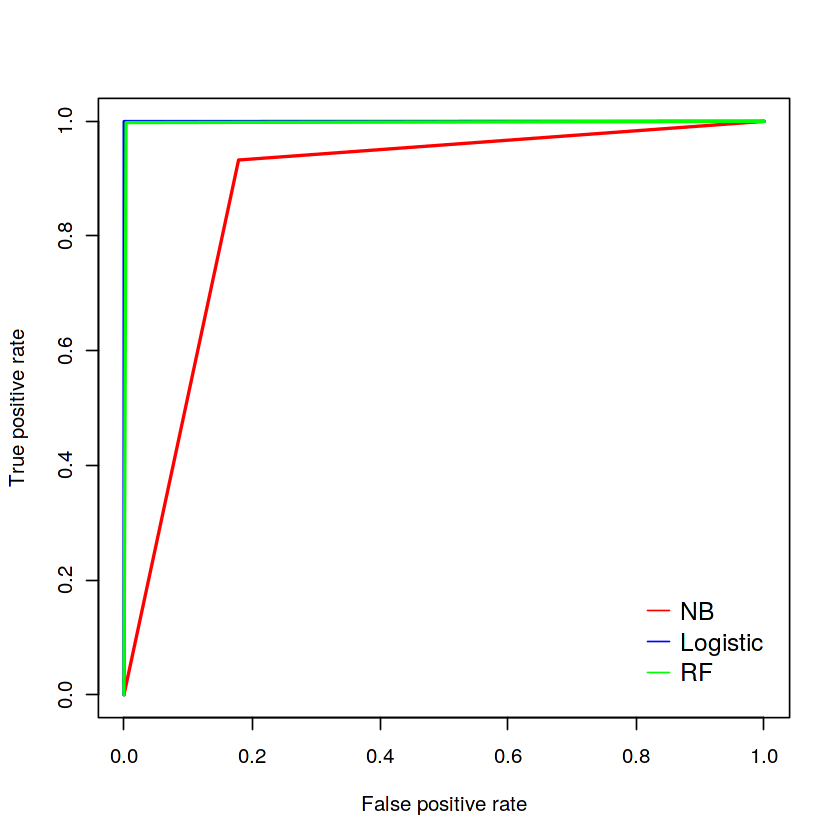

In [39]:
# Plot ROC Curve for train set
prediction(as.numeric(train_news$pred_nb), as.numeric(train_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(col = 'red', lwd = 2)

prediction(as.numeric(train_news$pred_lr), as.numeric(train_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(add = TRUE, col = 'blue', lwd = 2)

prediction(as.numeric(train_news$pred_rf), as.numeric(train_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(add = TRUE, col = 'green', lwd = 2)

legend(0.8, 0.2, legend=c("NB", "Logistic", "RF"),
       col=c("red", "blue", 'green'), lty = 1, cex = 1.2, box.lty = 0)

> Logistic Regression & Random Forest Model fits data almost perfectly.

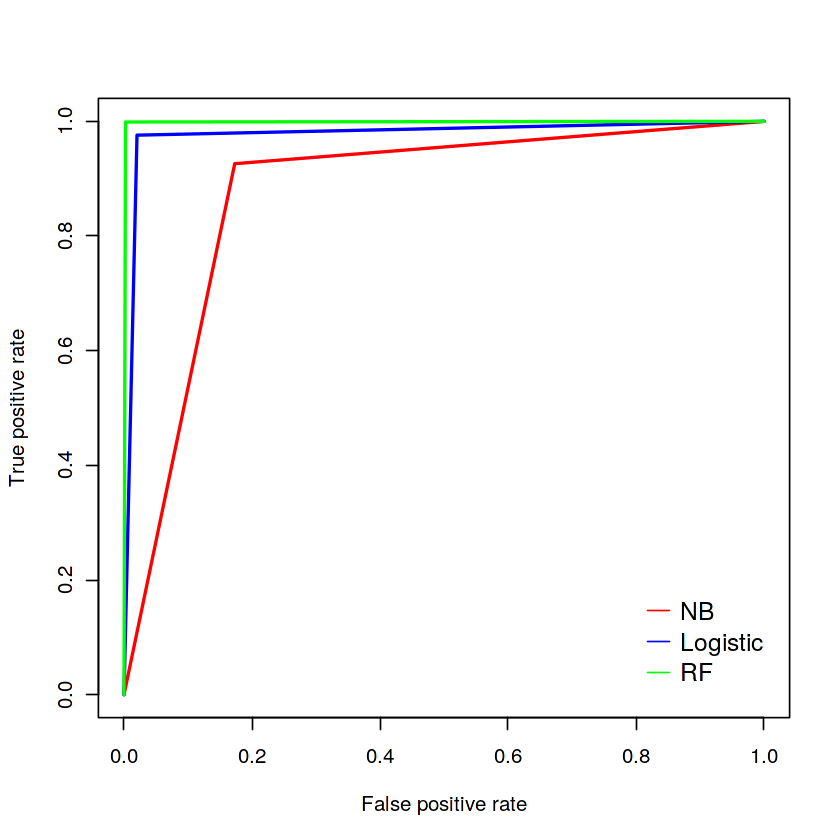

In [40]:
# Plot ROC Curve for test set
prediction(as.numeric(test_news$pred_nb), as.numeric(test_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(col = 'red', lwd = 2)

prediction(as.numeric(test_news$pred_lr), as.numeric(test_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(add = TRUE, col = 'blue', lwd = 2)

prediction(as.numeric(test_news$pred_rf), as.numeric(test_news$category)) %>%
    performance('tpr', 'fpr') %>%
    plot(add = TRUE, col = 'green', lwd = 2)

legend(0.8, 0.2, legend=c("NB", "Logistic", "RF"),
       col=c("red", "blue", 'green'), lty = 1, cex = 1.2, box.lty = 0)

> On Validation set, Random Forest model slightly outperform Logistic Regression Model.

In [41]:
# Set Threshold for Logistic Regression Model
roc(test_news$category, test_news$pred_lr) %>% coords()

test_news$pred_lr <- ifelse(test_news$pred_lr > 0.5, 1, 0)
test_news$pred_lr <- as.factor(test_news$pred_lr)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in coords.roc(.):
“The 'transpose' argument to FALSE by default since pROC 1.16. Set transpose = TRUE explicitly to revert to the previous behavior, or transpose = TRUE to silence this warning. Type help(coords_transpose) for additional information.”


threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.0000000,1.000000
0.5,0.9796946,0.975883
Inf,1.0000000,0.000000


In [42]:
# Confussion Matrix
conf_nb <- caret::confusionMatrix(test_news$category, test_news$pred_nb)
conf_lr <- caret::confusionMatrix(test_news$category, test_news$pred_lr)
conf_rf <- caret::confusionMatrix(test_news$category, test_news$pred_rf)

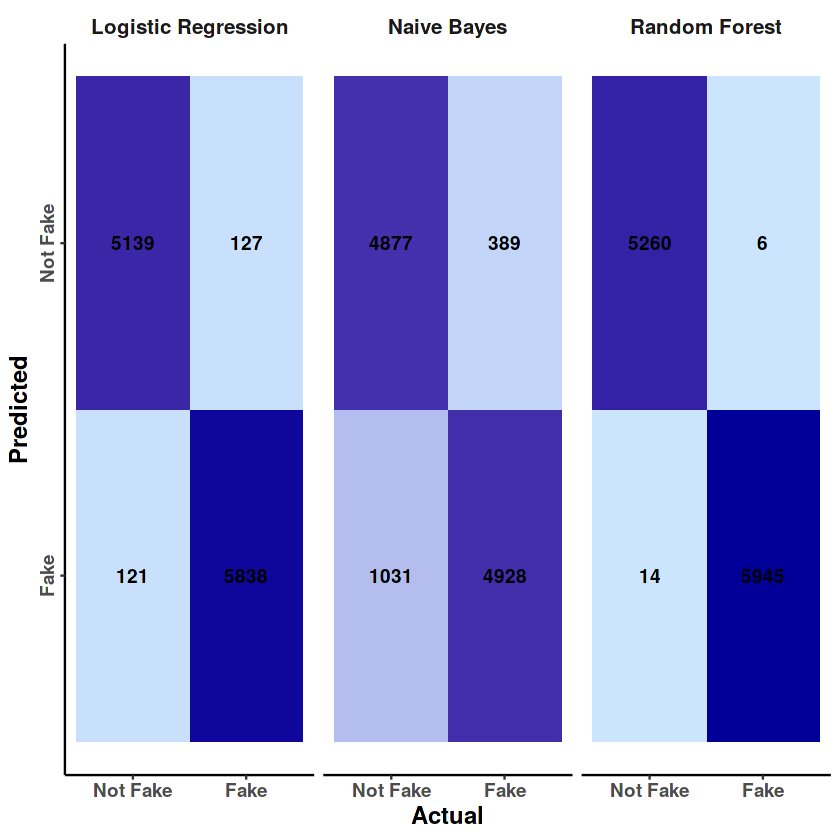

In [43]:
# Heatmap of Confusion Matrix
bind_rows(as.data.frame(conf_nb$table), as.data.frame(conf_lr$table), as.data.frame(conf_rf$table)) %>% 
  mutate(Model = rep(c('Naive Bayes', 'Logistic Regression', 'Random Forest'), each = 4)) %>%
  ggplot(aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  labs(x = 'Actual', y = 'Predicted') +
  scale_fill_gradient(low = "#CCE5FF", high = "#000099") +
  scale_x_discrete(limits = c('1', '0'), labels = c('1' = 'Not Fake', '0' = 'Fake')) +
  scale_y_discrete(labels = c('1' = 'Not Fake', '0' = 'Fake')) +
  facet_grid(. ~ Model) +
  geom_text(aes(label = Freq), fontface = 'bold') +
  theme(panel.background = element_blank(),
        legend.position = 'none',
        axis.line = element_line(colour = "black"),
        axis.title = element_text(size = 14, face = 'bold'),
        axis.text = element_text(size = 11, face = 'bold'),
        axis.text.y = element_text(angle = 90, hjust = 0.5),
        strip.background = element_blank(),
        strip.text = element_text(size = 12, face = 'bold'))

In [44]:
acc <- c(nb = conf_nb[['overall']]['Accuracy'], 
         lr = conf_lr[['overall']]['Accuracy'],
         rf = conf_rf[['overall']]['Accuracy'])
precision <- c(nb = conf_nb[['byClass']]['Pos Pred Value'], 
               lr = conf_lr[['byClass']]['Pos Pred Value'], 
               rf = conf_rf[['byClass']]['Pos Pred Value'])
recall <- c(nb = conf_nb[['byClass']]['Sensitivity'], 
            lr = conf_lr[['byClass']]['Sensitivity'],
            rf = conf_rf[['byClass']]['Sensitivity'])

data.frame(Model = c('Naive Bayes', 'Logistic Regression', 'Random Forest'),
           Accuracy = acc,
           F1_Score = (2 * precision * recall) / (precision + recall),
           row.names = NULL)

Model,Accuracy,F1_Score
<fct>,<dbl>,<dbl>
Naive Bayes,0.8734967,0.8740688
Logistic Regression,0.9779065,0.9792016
Random Forest,0.9982183,0.9983207
